<a href="https://colab.research.google.com/github/MpRonald/Machine-Learning/blob/main/Data_base_census.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [3]:
url = "https://raw.githubusercontent.com/MpRonald/datasets/main/census.csv"
data = pd.read_csv(url, sep=',')
data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
final-weight,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loos,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hour-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [5]:
data.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

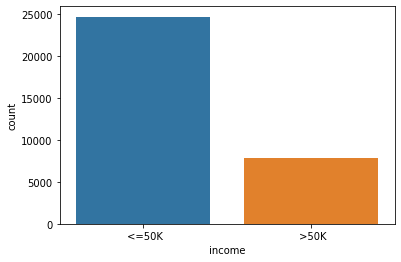

In [6]:
sns.countplot(x = data.income);

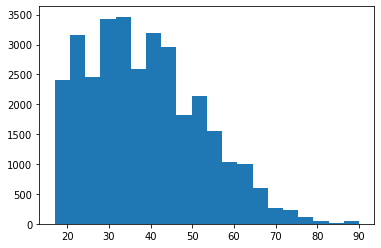

In [7]:
plt.hist(x = data.age, bins = 20);

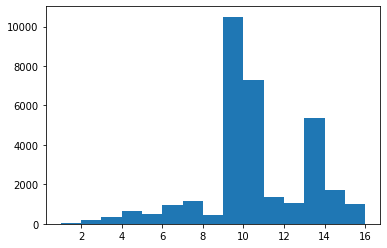

In [8]:
plt.hist(x = data['education-num'], bins=15);

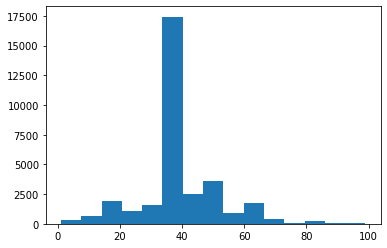

In [9]:
plt.hist(x = data['hour-per-week'], bins = 15);

In [10]:
graphic = px.treemap(data, path=['workclass', 'age'])
graphic.show()

In [11]:
graphic = px.treemap(data, path=['occupation', 'age'])
graphic.show()

In [12]:
graphic = px.parallel_categories(data, dimensions=['occupation', 'education'])
graphic.show()

In [13]:
graphic = px.parallel_categories(data, dimensions=['occupation', 'education',
                                                   'income'])
graphic.show()

# Divisão entre previsores e target

In [14]:
X = data.iloc[:, 0:14].values
X

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [15]:
y = data.iloc[:,14].values
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

# Tratamento de atributos categóricos

In [16]:
lb = LabelEncoder()

X[:,1] = lb.fit_transform(X[:,1])
X[:,3] = lb.fit_transform(X[:,3])
X[:,5] = lb.fit_transform(X[:,5])
X[:,6] = lb.fit_transform(X[:,6])
X[:,7] = lb.fit_transform(X[:,7])
X[:,8] = lb.fit_transform(X[:,8])
X[:,9] = lb.fit_transform(X[:,9])
X[:,13] = lb.fit_transform(X[:,13])


In [17]:
X

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

# One Hote Encoder

In [18]:
oneHoteEncoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(),
                                                  [1,3,5,6,7,8,9,13])],
                                                  remainder='passthrough')

In [19]:
X = oneHoteEncoder.fit_transform(X).toarray()

In [20]:
X

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [21]:
X.shape

(32561, 108)

# Escalonamento

In [23]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [29]:
X_train.shape, y_train.shape

((24420, 108), (24420,))

In [30]:
X_test.shape, y_test.shape

((8141, 108), (8141,))